<a href="https://colab.research.google.com/github/PrajwalBharadwajN/VTU_ML_LAB/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Dataset for Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset.csv")
print(df.head(5))
print(df.tail(5))

   0         1         2  3
0  1 -0.383362 -0.487992  0
1  1 -2.360335 -2.440053  0
2  1 -0.358443  0.141981  0
3  1  0.991341  0.804249  0
4  1 -0.133086 -0.237400  0
      0         1         2  3
1995  1  0.095230  3.332253  1
1996  1 -1.062603  2.929609  1
1997  1  1.550248  4.898206  1
1998  1  0.059165  4.654552  1
1999  1  0.837489  5.211599  1


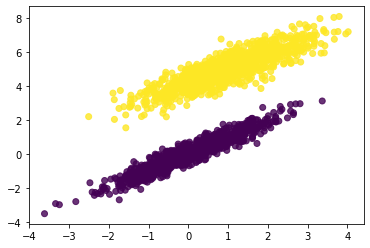

In [29]:
plt.figure(0)
plt.scatter(df.values[:,1], df.values[:,2], c = df['3'], alpha=0.8)

In [0]:
#Convert the values to store in numpy array
df = df.values  
                
np.random.seed(5)
np.random.shuffle(df)

train = df[0:int(0.7*len(df))]
test = df[int(0.7*len(df)):int(len(df))]

x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]


In [32]:
def perceptron_train(x, y, z, eta, t):
    '''
    Input Parameters:
        x: data set of input features
        y: actual outputs
        z: activation function threshold
        eta: learning rate
        t: number of iterations
    '''
    
    # initializing the weights
    w = np.zeros(len(x[0]))      
    n = 0                        
    
    # initializing additional parameters to compute sum-of-squared errors
    yhat_vec = np.ones(len(y))     # vector for predictions
    errors = np.ones(len(y))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
    
    while n < t: 
        for i in range(0, len(x)):                 
            
            # dot product
            f = np.dot(x[i], w)   
                  
            # activation function
            if f >= z:                               
                yhat = 1.                               
            else:                                   
                yhat = 0.
            yhat_vec[i] = yhat
            
            # updating the weights
            for j in range(0, len(w)):             
                w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]
                
        n += 1
        # computing the sum-of-squared errors
        for i in range(0,len(y)):     
           errors[i] = (y[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))
        
    return w, J

z = 0.0
eta = 0.1
t = 50

perceptron_train(x_train, y_train, z, eta, t)

w = perceptron_train(x_train, y_train, z, eta, t)[0]
J = perceptron_train(x_train, y_train, z, eta, t)[1]

print(w)
print(J)


[-0.5        -0.29850122  0.35054929]
[4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Perceptron Convergence')

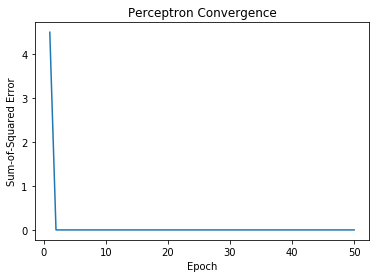

In [34]:
#Plot of Convergence of Perceptron
J = perceptron_train(x_train, y_train, z, eta, t)[1]
epoch = np.linspace(1,len(J),len(J))

plt.figure(1)
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')


In [35]:
#testing the model
from sklearn.metrics import accuracy_score

w = perceptron_train(x_train, y_train, z, eta, t)[0]

def perceptron_test(x, w, z, eta, t):
    y_pred = []
    for i in range(0, len(x-1)):
        f = np.dot(x[i], w)   

        # activation function
        if f > z:                               
            yhat = 1                               
        else:                                   
            yhat = 0
        y_pred.append(yhat)
    return y_pred

y_pred = perceptron_test(x_test, w, z, eta, t)

print("The accuracy score is:")
print(accuracy_score(y_test, y_pred))


The accuracy score is:
1.0


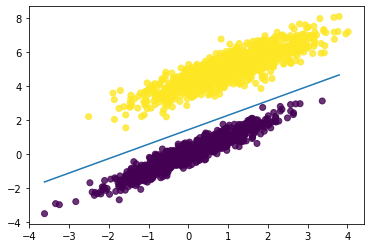

In [36]:
#Plotting Decision Boundary
min = np.min(x_test[:,1])
max = np.max(x_test[:,1])
x1 = np.linspace(min,max,100)

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in range(0, len(x1-1)):
        x2_temp = (-w0-w1*x1[i])/w2
        x2.append(x2_temp)
    return x2

x_2 = np.asarray(x2(x1,w))

df = pd.read_csv("dataset.csv")

obs = 1000
plt.figure(2)
plt.scatter(df.values[:,1], df.values[:,2], c = df['3'], alpha=0.8)
plt.plot(x1, x_2)



In [37]:
#Comparing with scikit learn
from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0=0.1, shuffle=False, fit_intercept=False)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("sklearn weights:")
print(clf.coef_[0])

print("my perceptron weights:")
print(w)

sklearn weights:
[-0.5        -0.29850122  0.35054929]
my perceptron weights:
[-0.5        -0.29850122  0.35054929]
